In [124]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
df = pd.read_csv('ex1data1.txt',header=None)

In [126]:
df.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [127]:
df.columns = ['population','profit']

In [128]:
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Text(0, 0.5, 'Profit in $10,000s')

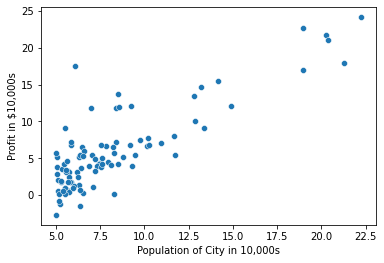

In [129]:
ax = sns.scatterplot(x=df.population,y=df.profit,)
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")

In [130]:
TRAIN_SIZE = 0.7 
DF_SIZE = len(df)

In [131]:
df_temp = df.copy()

In [132]:
scaler = MinMaxScaler()

df[['population']] = scaler.fit_transform(df[['population']])

In [133]:
X = df[['population']].to_numpy()
y = df[['profit']].to_numpy()


X_train = X[0:int(TRAIN_SIZE*DF_SIZE)]
y_train = y[0:int(TRAIN_SIZE*DF_SIZE)]

X_test = X[int(TRAIN_SIZE*DF_SIZE):]
y_test = y[int(TRAIN_SIZE*DF_SIZE):]


In [134]:
### User Defined Linear Regression

def estimate_coef_linear_regression(X_train, y_train):
    
    Theta = np.zeros(X_train.shape[1]).reshape(-1,1)

    a = 0.2
    m = X_train.shape[0]

    for i in range(100000):
        h = np.dot(X_train,Theta)
        J = sum((h-y_train)**2)/(2*X_train.shape[0])
        Theta = Theta - (a/m) * np.dot(X_train.transpose(),(h-y_train))
    
    return Theta

In [135]:
y_train = np.array(y_train.astype("float"))
y_test = np.array(y_test.astype("float"))

Theta = estimate_coef_linear_regression(X_train, y_train)

In [136]:
Theta

array([[25.60838157]])

In [137]:
y_pred = np.dot(X_test,Theta)

In [138]:
def r_squared(y_test, y_pred):
    return 1 - ((np.sum((y_test-y_pred)**2)) / np.sum((y_test - np.mean(y_test))**2))

In [139]:
r_squared(y_test, y_pred)

0.7346881140759045

In [140]:
#Prediction Without Feature Scaling

X = df_temp[['population']].to_numpy()
y = df_temp[['profit']].to_numpy()

X_test = X[int(TRAIN_SIZE*DF_SIZE):]
y_test = y[int(TRAIN_SIZE*DF_SIZE):]


In [141]:
y_train = np.array(y_train.astype("float"))
y_test = np.array(y_test.astype("float"))

Theta = estimate_coef_linear_regression(X_train, y_train)

In [143]:
Theta

array([[25.60838157]])

In [144]:
y_pred = np.dot(X_test,Theta)
r_squared(y_test, y_pred)

-2241.7535474217243

In [82]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [83]:
model.score(X_test,y_test)

0.5967311911126678

In [84]:
model.coef_

array([[19.89323332]])

In [85]:
model.score(X_test,y_test)

0.5967311911126678

In [86]:
y_pred = model.predict(X_test)

In [87]:
r_squared(y_test, y_pred)

0.5967311911126678